In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")   
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('C:/Users/AdityaShah(AIMlOps)/OneDrive - Intuitive Technology Partners, Inc/Desktop/Python environment/.venv/AIML Dataset.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape[0]

6362620

In [11]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)

np.float64(0.13)

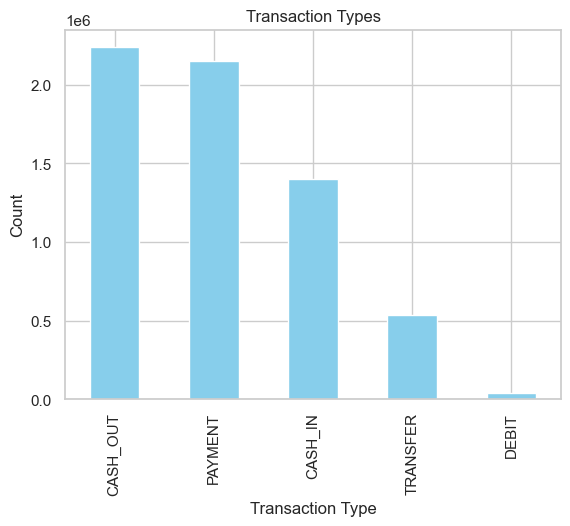

In [12]:
df["type"].value_counts().plot(kind='bar', title="Transaction Types", color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

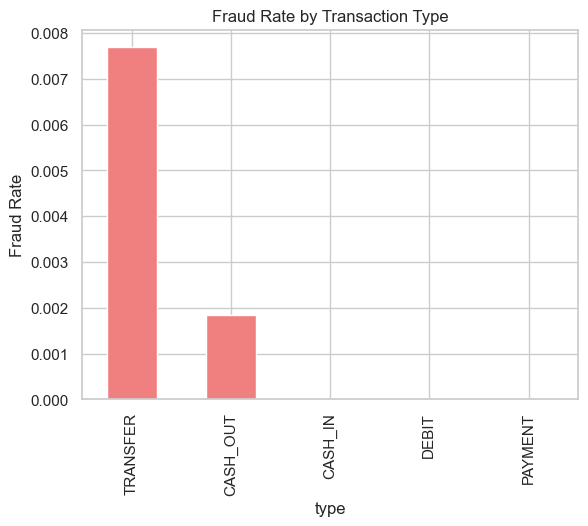

In [13]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title="Fraud Rate by Transaction Type", color='lightcoral')
plt.ylabel("Fraud Rate")
plt.show()

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

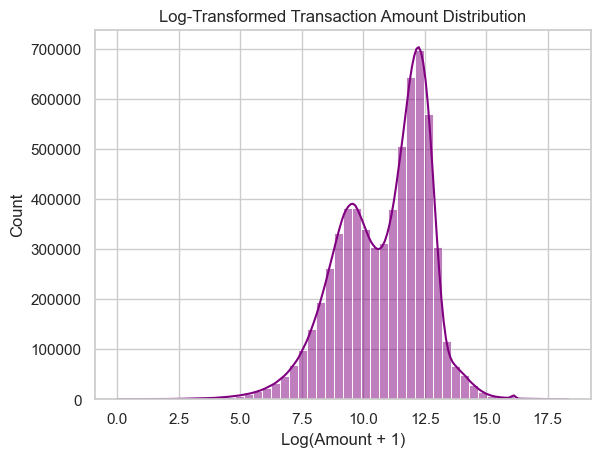

In [15]:
sns.histplot(np.log1p(df["amount"]), bins=50, kde=True, color='purple')
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log(Amount + 1)")
plt.show()

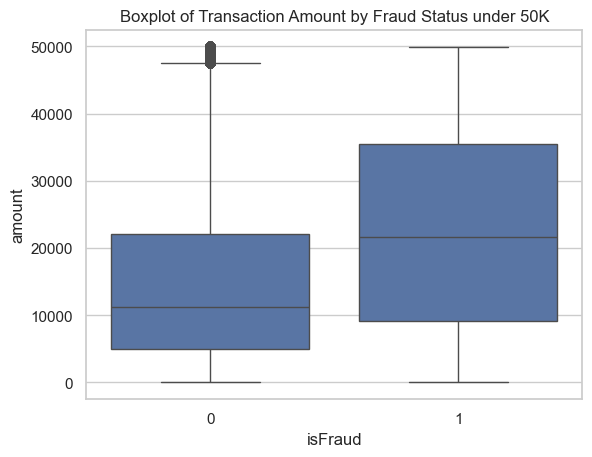

In [16]:
sns.boxplot(data = df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Boxplot of Transaction Amount by Fraud Status under 50K")
plt.show()

In [17]:
df["balanceDiffOrg"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [18]:
(df["balanceDiffOrg"] < 0).sum()

np.int64(1399253)

In [19]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

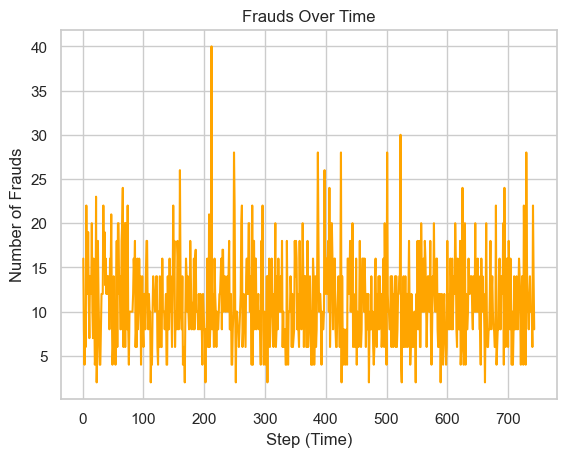

In [20]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per step" , color='orange')
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [21]:
df.drop(columns="step", inplace=True)

In [22]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [23]:
top_senders = df["nameOrig"].value_counts().head(10)


In [24]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [25]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [26]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [27]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]


In [28]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

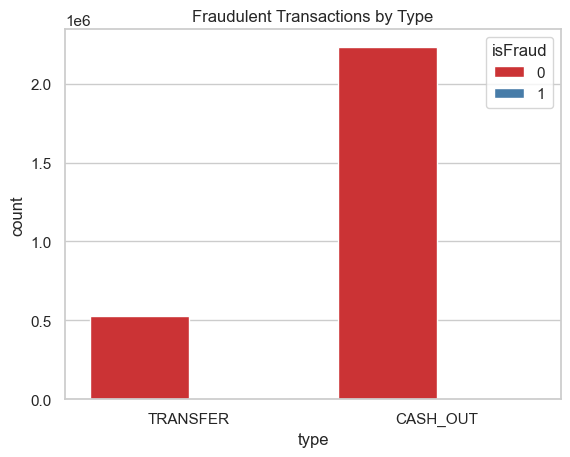

In [29]:
sns.countplot(data=fraud_types, x="type", hue="isFraud", palette="Set1")
plt.title("Fraudulent Transactions by Type")
plt.show()

In [30]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


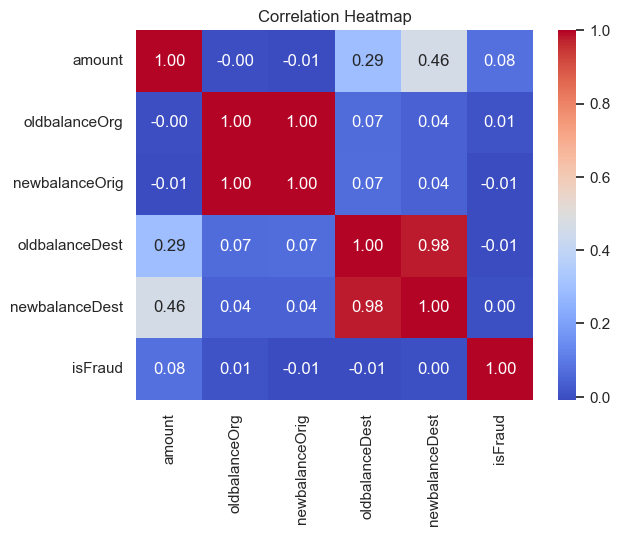

In [31]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"])) 
]

In [33]:
len(zero_after_transfer)

1188074

In [34]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [35]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer


In [37]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1 )

In [38]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [39]:
categorical_features = ["type"]
numerical_features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", ]


In [ ]:
def add_balance_diff(X):
    X = X.copy()
    X["balanceDiffOrg"] = X["oldbalanceOrg"] - X["newbalanceOrig"]
    X["balanceDiffDest"] = X["newbalanceDest"] - X["oldbalanceDest"]
    return X
feature_engineering = FunctionTransformer(add_balance_diff)

In [40]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [42]:
print("Class distribution before upsampling:")
print(y_train.value_counts())

Class distribution before upsampling:
isFraud
0    4448085
1       5749
Name: count, dtype: int64


In [43]:
# Combine X_train and y_train for resampling
train = pd.concat([X_train, y_train], axis=1)
majority = train[train['isFraud'] == 0]
minority = train[train['isFraud'] == 1]

# Upsample minority class
minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

# Combine and shuffle
upsampled = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=42)
X_train = upsampled.drop('isFraud', axis=1)
y_train = upsampled['isFraud']

In [44]:
print("\nClass distribution after upsampling:")
print(y_train.value_counts())


Class distribution after upsampling:
isFraud
0    4448085
1    4448085
Name: count, dtype: int64


In [45]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="drop"
)



In [ ]:
feature_selector = SelectFromModel(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
)

In [ ]:
pipeline = Pipeline([
    ('feature_engineering', feature_engineering),
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000, class_weight='balanced'))
])

In [47]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
}


In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [50]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l2']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [51]:
best_model = grid_search.best_estimator_

In [61]:
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


In [62]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_scores = cross_val_score(xgb_pipeline, X, y, cv=cv, scoring='f1', n_jobs=-1)
print("XGBoost F1 scores (cv):", xgb_scores)
print("XGBoost F1 mean:", xgb_scores.mean())


XGBoost F1 scores (cv): [0.74570562 0.78860673 0.80460549 0.79068174 0.8486505 ]
XGBoost F1 mean: 0.7956500145190812


In [63]:
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_grid,
    n_iter=15,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_random_search.best_params_)

# Evaluate on test set
y_pred_xgb = xgb_random_search.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


Best XGBoost Params: {'xgb__subsample': 0.8, 'xgb__n_estimators': 200, 'xgb__max_depth': 9, 'xgb__learning_rate': 0.3, 'xgb__colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.67      0.93      0.78      2464

    accuracy                           1.00   1908786
   macro avg       0.83      0.96      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786



In [52]:
import os

# Create the directory if it doesn't exist
os.makedirs("./fraud-detection-report", exist_ok=True)


In [53]:
import skore

# Replace with your actual project name or location
project = skore.Project("./fraud-detection-report")
  # or skore.Project("hub://<tenant>/<name>")

from sklearn.base import clone
from sklearn.linear_model import LogisticRegression

# You can optionally extract the preprocessed features:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Clone classifier without pipeline (skore expects plain estimators)
clf = clone(pipeline.named_steps["classifier"])
clf.fit(X_train_processed, y_train)

report = skore.EstimatorReport(
    clf,
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
)

project.put("fraud_detection_report", report)

# Save report in a visible format
with open("./fraud-detection-report/fraud_detection_report.txt", "w", encoding="utf-8") as f:
    f.write(str(report))



In [54]:
y_pred = best_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [56]:
confusion_matrix(y_test, y_pred)

array([[1805345,  100977],
       [    157,    2307]])

In [57]:
pipeline.score(X_test, y_test)

0.9473895973671224

In [64]:
# Best Model After Hyperparameter Tuning (e.g., Logistic Regression)
print(" Best Logistic Regression Model After Hyperparameter Tuning")
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy:", best_model.score(X_test, y_test))
print("\n Best Hyperparameters Found (Logistic Regression):", grid_search.best_params_)

print("\n" + "="*80 + "\n")

# Best XGBoost Model After Hyperparameter Tuning
print(" Best XGBoost Model After Hyperparameter Tuning")
y_pred_xgb = xgb_random_search.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", xgb_random_search.score(X_test, y_test))
print("\n Best Hyperparameters Found (XGBoost):", xgb_random_search.best_params_)


 Best Logistic Regression Model After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

Confusion Matrix:
 [[1805345  100977]
 [    157    2307]]
Accuracy: 0.9470165854108318

 Best Hyperparameters Found (Logistic Regression): {'classifier__C': 10, 'classifier__penalty': 'l2'}


 Best XGBoost Model After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.67      0.93      0.78      2464

    accuracy                           1.00   1908786
   macro avg       0.83      0.96      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1905180    1142]
 [    17

In [59]:
import joblib

joblib.dump(pipeline, 'fraud_detection_best_model.pkl')

['fraud_detection_best_model.pkl']